In [1]:
import xarray as xr
import xoak
import numpy as np

In [2]:
!ls -1 ../channel_data/ | head -n 20

fesom.mesh.diag.nc
u.fesom.1958.nc
u.fesom.1959.nc
u.fesom.1960.nc
u.fesom.1961.nc
u.fesom.1962.nc
u.fesom.1963.nc
u.fesom.1964.nc
u.fesom.1965.nc
u.fesom.1966.nc
u.fesom.1967.nc
u.fesom.1968.nc
u.fesom.1969.nc
u.fesom.1970.nc
u.fesom.1971.nc
u.fesom.1972.nc
u.fesom.1973.nc
u.fesom.1974.nc
u.fesom.1975.nc
u.fesom.1976.nc


In [3]:
ds_mesh = xr.open_dataset("../channel_data/fesom.mesh.diag.nc")
ds_mesh = ds_mesh.assign_coords(nod2=list(range(1, ds_mesh.sizes["nod2"] + 1)))
ds_mesh = ds_mesh.assign_coords(elem=list(range(1, ds_mesh.sizes["elem"] + 1)))
ds_mesh

<xarray.Dataset> Size: 9MB
Dimensions:            (nz: 41, nz1: 40, elem: 21120, nod2: 10608, n3: 3,
                        n2: 2, edg_n: 31728, N: 6, n4: 4)
Coordinates:
  * nz                 (nz) float64 328B 0.0 9.038 18.98 ... 3.628e+03 4e+03
  * nz1                (nz1) float64 320B 4.519 14.01 ... 3.459e+03 3.814e+03
  * nod2               (nod2) int64 85kB 1 2 3 4 5 ... 10605 10606 10607 10608
  * elem               (elem) int64 169kB 1 2 3 4 5 ... 21117 21118 21119 21120
Dimensions without coordinates: n3, n2, edg_n, N, n4
Data variables: (12/21)
    fesom_mesh         int32 4B ...
    elem_area          (elem) float64 169kB ...
    nlevels_nod2D      (nod2) int32 42kB ...
    nlevels            (elem) int32 84kB ...
    nod_in_elem2D_num  (nod2) int32 42kB ...
    nod_part           (nod2) int32 42kB ...
    ...                 ...
    face_links         (n3, elem) float64 507kB ...
    edge_face_links    (n2, edg_n) float64 508kB ...
    nod_in_elem2D      (N, nod2) int32 255kB ...
    edge_cross_dxdy    (n4, edg_n) float64 1MB ...
    gradient_sca_x     (n3, elem) float64 507kB ...
    gradient_sca_y     (n3, elem) float64 507kB ...
Attributes:
    Conventions:  UGRID-1.0

In [4]:
elem_corner_lons = ds_mesh.lon.sel(nod2=ds_mesh.face_nodes)
elem_corner_lats = ds_mesh.lat.sel(nod2=ds_mesh.face_nodes)
display(elem_corner_lons)
display(elem_corner_lats)

<xarray.DataArray 'lon' (n3: 3, elem: 21120)> Size: 507kB
[63360 values with dtype=float64]
Coordinates:
    nod2     (n3, elem) int64 507kB 1 2 3 4 5 6 7 ... 217 216 219 218 221 220
  * elem     (elem) int64 169kB 1 2 3 4 5 6 ... 21116 21117 21118 21119 21120
Dimensions without coordinates: n3
Attributes:
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

<xarray.DataArray 'lat' (n3: 3, elem: 21120)> Size: 507kB
[63360 values with dtype=float64]
Coordinates:
    nod2     (n3, elem) int64 507kB 1 2 3 4 5 6 7 ... 217 216 219 218 221 220
  * elem     (elem) int64 169kB 1 2 3 4 5 6 ... 21116 21117 21118 21119 21120
Dimensions without coordinates: n3
Attributes:
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north

In [5]:
display(elem_corner_lats.isel(elem=slice(None, 3)).compute().data)
display(elem_corner_lons.isel(elem=slice(None, 3)).compute().data)

array([[0.    , 0.0814, 0.1628],
       [0.0814, 0.0814, 0.2442],
       [0.    , 0.    , 0.1628]])

array([[0.    , 0.0469, 0.    ],
       [0.0469, 0.1406, 0.0469],
       [0.0938, 0.0938, 0.0938]])

In [6]:
triangle_overlaps = (elem_corner_lons.max("n3") - elem_corner_lons.min("n3")) > 4
triangle_overlaps

<xarray.DataArray 'lon' (elem: 21120)> Size: 21kB
array([False, False, False, ...,  True,  True,  True])
Coordinates:
  * elem     (elem) int64 169kB 1 2 3 4 5 6 ... 21116 21117 21118 21119 21120

In [7]:
elem_corner_lons_unglued = xr.where(triangle_overlaps & (elem_corner_lons > 4), elem_corner_lons - 4.5, elem_corner_lons)
elem_corner_lons_unglued

<xarray.DataArray 'lon' (elem: 21120, n3: 3)> Size: 507kB
array([[ 0.    ,  0.0469,  0.0938],
       [ 0.0469,  0.1406,  0.0938],
       [ 0.    ,  0.0469,  0.0938],
       ...,
       [-0.0469,  0.    ,  0.0469],
       [-0.0469, -0.0938,  0.    ],
       [-0.0469,  0.    ,  0.0469]])
Coordinates:
  * elem     (elem) int64 169kB 1 2 3 4 5 6 ... 21116 21117 21118 21119 21120
    nod2     (n3, elem) int64 507kB 1 2 3 4 5 6 7 ... 217 216 219 218 221 220
Dimensions without coordinates: n3

In [8]:
elem_center_lons = elem_corner_lons_unglued.mean("n3")
elem_center_lats = elem_corner_lats.mean("n3")

In [9]:
from matplotlib import pyplot as plt

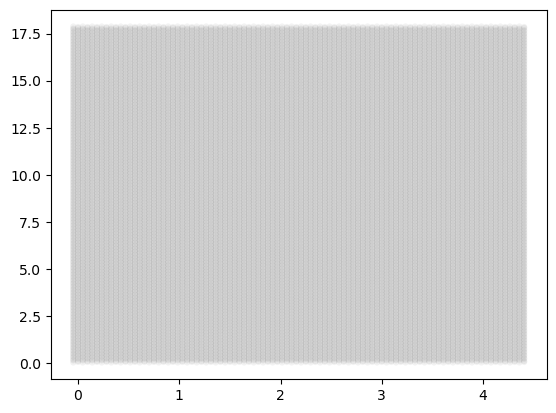

In [10]:
plt.scatter(elem_center_lons, elem_center_lats, s=20, alpha=0.05, edgecolor="none", facecolor="k")

In [11]:
ds_mesh = ds_mesh.assign_coords(
    elem_center_lons=elem_center_lons,
    elem_center_lats=elem_center_lats,
)
# ds_mesh = ds_mesh.assign_coords({
#     "elem_center 😵 lons": elem_center_lons,
#     "elem_center_lats": elem_center_lats,
# })
ds_mesh

<xarray.Dataset> Size: 9MB
Dimensions:            (nz: 41, nz1: 40, elem: 21120, nod2: 10608, n3: 3,
                        n2: 2, edg_n: 31728, N: 6, n4: 4)
Coordinates:
  * nz                 (nz) float64 328B 0.0 9.038 18.98 ... 3.628e+03 4e+03
  * nz1                (nz1) float64 320B 4.519 14.01 ... 3.459e+03 3.814e+03
  * nod2               (nod2) int64 85kB 1 2 3 4 5 ... 10605 10606 10607 10608
  * elem               (elem) int64 169kB 1 2 3 4 5 ... 21117 21118 21119 21120
    elem_center_lons   (elem) float64 169kB 0.0469 0.09377 ... -2.752e-16
    elem_center_lats   (elem) float64 169kB 0.02713 0.05427 ... 17.88 17.85
Dimensions without coordinates: n3, n2, edg_n, N, n4
Data variables: (12/21)
    fesom_mesh         int32 4B ...
    elem_area          (elem) float64 169kB ...
    nlevels_nod2D      (nod2) int32 42kB ...
    nlevels            (elem) int32 84kB ...
    nod_in_elem2D_num  (nod2) int32 42kB ...
    nod_part           (nod2) int32 42kB ...
    ...                 ...
    face_links         (n3, elem) float64 507kB ...
    edge_face_links    (n2, edg_n) float64 508kB ...
    nod_in_elem2D      (N, nod2) int32 255kB ...
    edge_cross_dxdy    (n4, edg_n) float64 1MB ...
    gradient_sca_x     (n3, elem) float64 507kB ...
    gradient_sca_y     (n3, elem) float64 507kB ...
Attributes:
    Conventions:  UGRID-1.0

In [12]:
ds_mesh.xoak.set_index(["elem_center_lats", "elem_center_lons"], "sklearn_geo_balltree")

In [13]:
grid_lon = xr.DataArray(np.linspace(0, 4.5, 101), dims=("grid_lon", ))
grid_lat = xr.DataArray(np.linspace(0, 18.0, 301), dims=("grid_lat", ))

In [14]:
target_lon, target_lat = xr.broadcast(grid_lon, grid_lat)

In [15]:
grid_elems = ds_mesh.xoak.sel(
    elem_center_lats=target_lat,
    elem_center_lons=target_lon,
).elem

grid_elems = grid_elems.assign_coords(
    target_lat=target_lat,
    target_lon=target_lon,
)

grid_elems = grid_elems.assign_coords(
    grid_lat=grid_lat,
    grid_lon=grid_lon,
)

grid_elems

<xarray.DataArray 'elem' (grid_lon: 101, grid_lat: 301)> Size: 243kB
array([[    1, 20682, 20902, ..., 21120,   439,   439],
       [    1,     1,   221, ...,   439,   439,   439],
       [    1,     2,   222, ...,   440,   439,   439],
       ...,
       [20242, 20242, 20462, ..., 20680, 20679, 20679],
       [20242, 20242, 20462, ..., 20680, 20680, 20679],
       [20242, 20242, 20462, ..., 20680, 20680, 20680]])
Coordinates:
    elem              (grid_lon, grid_lat) int64 243kB 1 20682 ... 20680 20680
    elem_center_lons  (grid_lon, grid_lat) float64 243kB 0.0469 ... 4.406
    elem_center_lats  (grid_lon, grid_lat) float64 243kB 0.02713 ... 17.85
    target_lat        (grid_lon, grid_lat) float64 243kB 0.0 0.06 ... 17.94 18.0
    target_lon        (grid_lon, grid_lat) float64 243kB 0.0 0.0 0.0 ... 4.5 4.5
  * grid_lat          (grid_lat) float64 2kB 0.0 0.06 0.12 ... 17.88 17.94 18.0
  * grid_lon          (grid_lon) float64 808B 0.0 0.045 0.09 ... 4.41 4.455 4.5

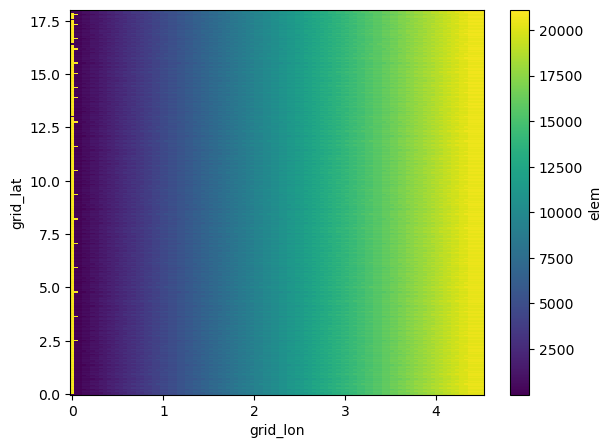

In [16]:
grid_elems.plot.imshow(x="grid_lon", y="grid_lat", size=5)

In [17]:
ds_u = xr.open_mfdataset("../channel_data/u.fesom.200?.nc", chunks={"time": 1, "nz1": 1}).isel(nz1=0)
ds_v = xr.open_mfdataset("../channel_data/v.fesom.200?.nc", chunks={"time": 1, "nz1": 1}).isel(nz1=0)

/opt/conda/envs/parcels/lib/python3.12/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "nz1" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/opt/conda/envs/parcels/lib/python3.12/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "nz1" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/opt/conda/envs/parcels/lib/python3.12/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "nz1" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/opt/conda/envs/parcels/lib/python3.12/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "nz1" st

In [18]:
U_grid = ds_u.u.isel(elem=grid_elems - 1)
V_grid = ds_v.v.isel(elem=grid_elems - 1)

In [19]:
SPD_grid = (U_grid ** 2 + V_grid ** 2) ** 0.5
SPD_grid

<xarray.DataArray (time: 3650, grid_lon: 101, grid_lat: 301)> Size: 444MB
dask.array<pow, shape=(3650, 101, 301), dtype=float32, chunksize=(1, 70, 301), chunktype=numpy.ndarray>
Coordinates:
    nz1               float64 8B 4.519
  * time              (time) datetime64[ns] 29kB 2000-01-01T23:50:00 ... 2009...
    elem              (grid_lon, grid_lat) int64 243kB 1 20682 ... 20680 20680
    elem_center_lons  (grid_lon, grid_lat) float64 243kB 0.0469 ... 4.406
    elem_center_lats  (grid_lon, grid_lat) float64 243kB 0.02713 ... 17.85
    target_lat        (grid_lon, grid_lat) float64 243kB 0.0 0.06 ... 17.94 18.0
    target_lon        (grid_lon, grid_lat) float64 243kB 0.0 0.0 0.0 ... 4.5 4.5
  * grid_lat          (grid_lat) float64 2kB 0.0 0.06 0.12 ... 17.88 17.94 18.0
  * grid_lon          (grid_lon) float64 808B 0.0 0.045 0.09 ... 4.41 4.455 4.5

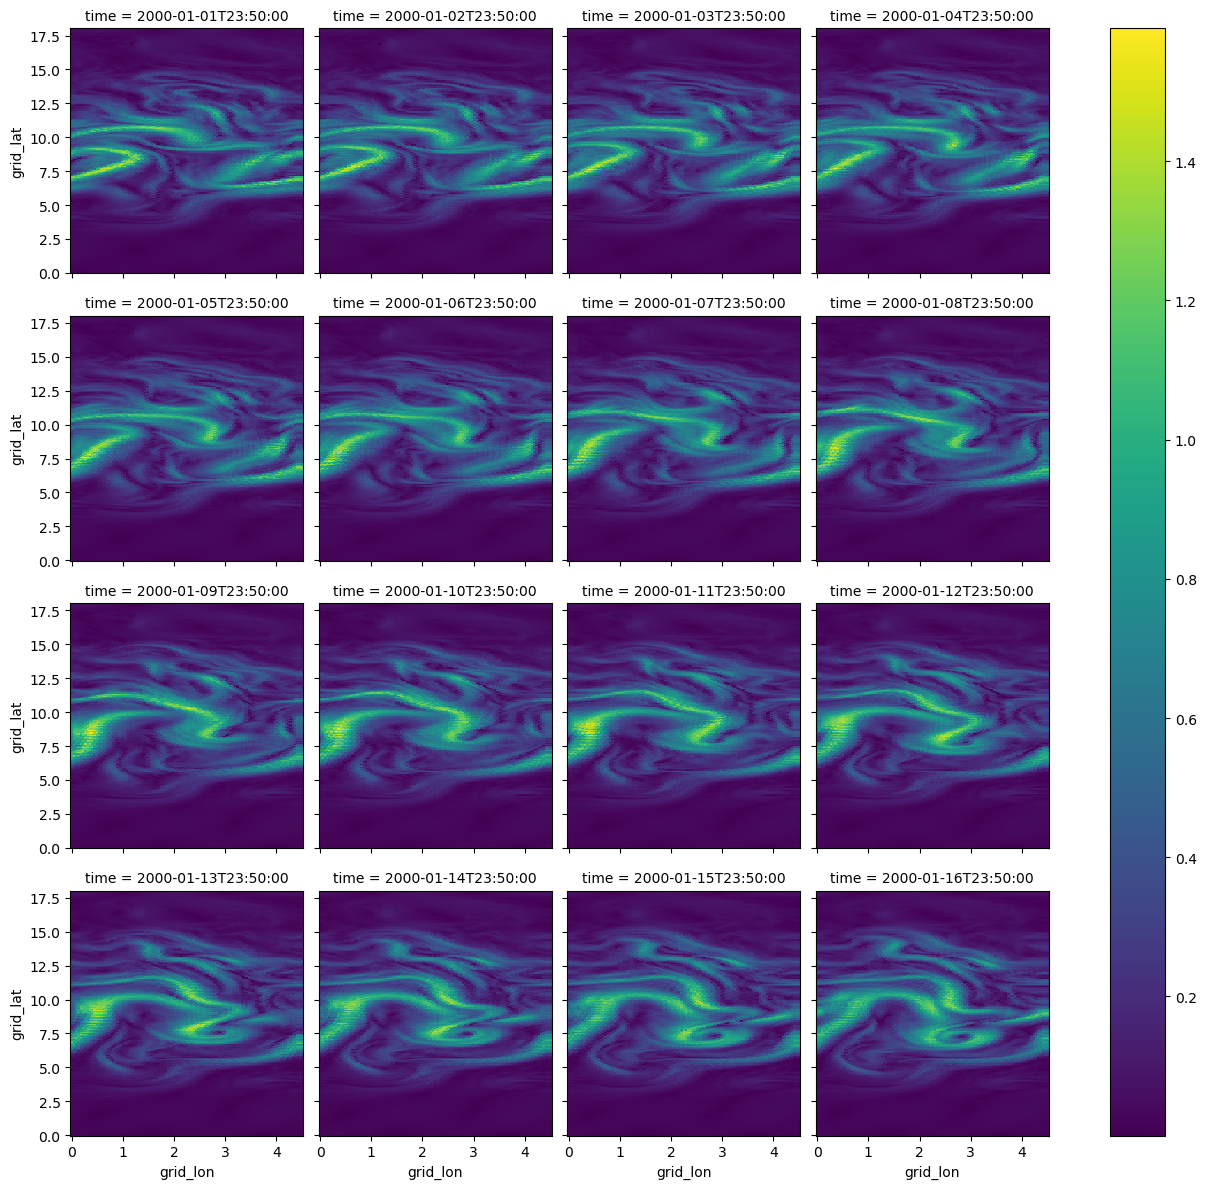

In [20]:
SPD_grid.isel(time=slice(None, 16)).plot(x="grid_lon", y="grid_lat", col="time", col_wrap=4);

In [21]:
ds_uv_grid = xr.Dataset({
    "U": U_grid,
    "V": V_grid,
})
ds_uv_grid

<xarray.Dataset> Size: 889MB
Dimensions:           (time: 3650, grid_lon: 101, grid_lat: 301)
Coordinates:
    nz1               float64 8B 4.519
  * time              (time) datetime64[ns] 29kB 2000-01-01T23:50:00 ... 2009...
    elem              (grid_lon, grid_lat) int64 243kB 1 20682 ... 20680 20680
    elem_center_lons  (grid_lon, grid_lat) float64 243kB 0.0469 ... 4.406
    elem_center_lats  (grid_lon, grid_lat) float64 243kB 0.02713 ... 17.85
    target_lat        (grid_lon, grid_lat) float64 243kB 0.0 0.06 ... 17.94 18.0
    target_lon        (grid_lon, grid_lat) float64 243kB 0.0 0.0 0.0 ... 4.5 4.5
  * grid_lat          (grid_lat) float64 2kB 0.0 0.06 0.12 ... 17.88 17.94 18.0
  * grid_lon          (grid_lon) float64 808B 0.0 0.045 0.09 ... 4.41 4.455 4.5
Data variables:
    U                 (time, grid_lon, grid_lat) float32 444MB dask.array<chunksize=(1, 70, 301), meta=np.ndarray>
    V                 (time, grid_lon, grid_lat) float32 444MB dask.array<chunksize=(1, 70, 301), meta=np.ndarray>

In [22]:
ds_uv_grid = ds_uv_grid.isel(time=slice(0, 100)).compute()
ds_uv_grid

<xarray.Dataset> Size: 26MB
Dimensions:           (time: 100, grid_lon: 101, grid_lat: 301)
Coordinates:
    nz1               float64 8B 4.519
  * time              (time) datetime64[ns] 800B 2000-01-01T23:50:00 ... 2000...
    elem              (grid_lon, grid_lat) int64 243kB 1 20682 ... 20680 20680
    elem_center_lons  (grid_lon, grid_lat) float64 243kB 0.0469 ... 4.406
    elem_center_lats  (grid_lon, grid_lat) float64 243kB 0.02713 ... 17.85
    target_lat        (grid_lon, grid_lat) float64 243kB 0.0 0.06 ... 17.94 18.0
    target_lon        (grid_lon, grid_lat) float64 243kB 0.0 0.0 0.0 ... 4.5 4.5
  * grid_lat          (grid_lat) float64 2kB 0.0 0.06 0.12 ... 17.88 17.94 18.0
  * grid_lon          (grid_lon) float64 808B 0.0 0.045 0.09 ... 4.41 4.455 4.5
Data variables:
    U                 (time, grid_lon, grid_lat) float32 12MB -0.006753 ... -...
    V                 (time, grid_lon, grid_lat) float32 12MB 0.0006259 ... 0...

In [23]:
from parcels import FieldSet

In [24]:
fieldset = FieldSet.from_xarray_dataset(
    ds_uv_grid.transpose("time", "grid_lat", "grid_lon"),
    variables={"U": "U", "V": "V"},
    dimensions={"lon": "grid_lon", "lat": "grid_lat", "time": "time"}
)
fieldset

In [25]:
from parcels import ParticleSet
from parcels import JITParticle
from parcels import AdvectionRK4
from datetime import timedelta

In [36]:
lon_start = np.random.uniform(2, 3, size=(100, ))
lat_start = np.random.uniform(7.5, 12.5, size=(100, ))

In [37]:
pset = ParticleSet.from_list(
    pclass=JITParticle,
    fieldset=fieldset,
    lon=lon_start,
    lat=lat_start,
)

In [38]:
pset.execute(
    AdvectionRK4,
    runtime=timedelta(hours=10),
    dt=timedelta(minutes=5),
)

INFO: Compiled ArrayJITParticleAdvectionRK4 ==> /tmp/parcels-26467/lib8364cedd0bfd71af6a2d35a7f921acef_0.so


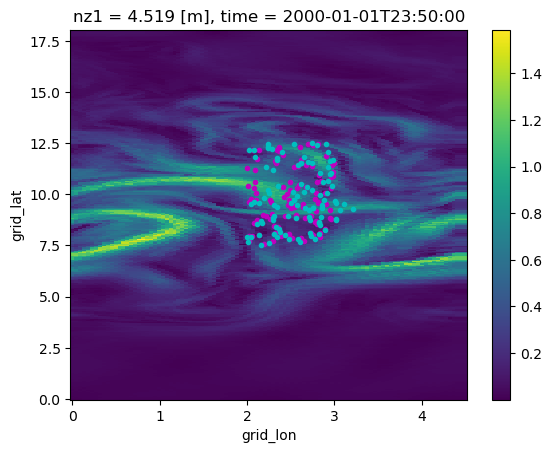

In [41]:
SPD_grid.isel(time=0).plot(x="grid_lon", y="grid_lat")

plt.plot(lon_start, lat_start, 'm.')
plt.plot(pset.lon, pset.lat, 'c.')